# Data prep for Pump it Up project

Back in the pcda class we did quite a bit of data prep work using R. Rarely is data ready for statistical/ML predictive modeling in its raw state. In this notebook we will do a few common data prep tasks in Python. This is not meant to be totally comprehensive and I make a bunch of big assumptions and take some shortcuts so that we can move on to modeling. A few of things we'll do, include:

* reading in the raw data from csv files - pandas
* automated EDA - pandas profiling and sweetviz
* manual EDA - pandas and matplotlib/Seaborn
* data type conversions - pandas
* variable dropping - pandas
* factor lumping - a port of R forcats package

## Preliminaries

In [1]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

Import commonly used libraries and magic command for inline plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib inline

## Read in raw data

Let's do the following:

* read in train_x and train_y to pandas dataframes,
* merge the data frames into a single training dataframe.

In [4]:
train_x = pd.read_csv("./data/raw/train_x.csv", parse_dates=['date_recorded'])
train_y = pd.read_csv("./data/raw/train_y.csv")

We can join the two dataframes on the `id` column.

In [5]:
train_df = pd.merge(train_x, train_y, on='id')

## Initial EDA

As always, let's check out the structure of the dataframes and scan the values a bit.

In [6]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [7]:
train_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [9]:
train_df.iloc[:5, :15]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1


In [10]:
train_df.iloc[:5, 15 :30]

,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment
0,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually
1,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay
2,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket
3,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay
4,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay


In [11]:
train_df.iloc[:5, 30:]

,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Since we will likely be dropping one or more columns before trying to fit models, let's create a list of all the column names and then we can remove some as we go. We can use `train_df.columns` to get an `Index` object whose values are the column names. To get a list version, use the `tolist` method.

In [12]:
cols_to_keep = train_df.columns.tolist()
cols_to_keep

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

Let's drop `date_recorded` and `recorded_by` as they seem irrelevant for a predictive model. What are some different ways to remove an item from a list in Python?

In [13]:
# To remove a single element
# cols_to_keep.remove('date_recorded')

# To remove multiple elements, create a list of cols to drop and then use
# a list comprehension to get a list of the ones to keep
to_drop = ['date_recorded', 'recorded_by']

cols_to_keep = [c for c in cols_to_keep if c not in to_drop]
cols_to_keep

['id',
 'amount_tsh',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

## Automated EDA

In R, we used a package called skimr to do quick, automated, basic EDA. Surely similar tools must exist for Python? A [little digging turned up several tools](https://github.com/mstaniak/autoEDA-resources). We'll look at two here - pandas-profiling and sweetviz.

### pandas-profiling

This has been around for a while and quickly gives you a much deeper look at pandas dataframes than you'd get from the the `info` and `describe` methods. The main site is at https://github.com/pandas-profiling/pandas-profiling.

If you want to install it and try it out, I've already installed it in our `aap` conda environment. If you need to install it yourself fro msome reason, I'd suggest using conda to install it via:

    conda install -c conda-forge pandas-profiling
    
Unfortunately, making pandas-profiling play nice with Jupyter Lab requires some additional installs. However, it works just fine with Juptyer Notebook and doing the conda install above automatically enables the necessary Jupyter widgets extensions. So, when I use pandas-profiling, I just open my notebook using the classic Jupyter Notebook interface. Just launch via the following and browse to your notebook to open.

    jupyter notebook

For more details regarding installation and using with Jupyter Lab, see the docs page at
https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/installation.html

The cells below do the necessary imports and generates the HTML profile report. I've also included a screenshot of my results. I've also included the generated HTML report in the Downloads file.    


![pandas profiling output](pandas_profiling_output.PNG)

In [18]:
from pandas_profiling import ProfileReport

In [19]:
profile = ProfileReport(train_df, title="Pandas Profiling Report")

In [20]:
profile.to_file("output/pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/54 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Sweetviz

Another impressive automated EDA packack is [Sweetviz](https://github.com/fbdesignpro/sweetviz. Like pandas-profiling, it creates an interactive HTML based report. It includes some features aimed at predictive modeling such as explicit analysis of the target variable and advanced correlation analysis. Some relevant references on Python tools for correlation analysis include:

* https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
* https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

To install sweetviz:

    pip install sweetviz



In [21]:
import sweetviz

In [22]:
report = sweetviz.analyze(train_df)

                                             |                                                                …

In [24]:
report.show_html("output/sweetviz_report.html")

Report output/sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


From the data dictionary and the dataframe snooping above, a few observations:

* the target variable, `status_group`, has three levels
* many fields are non-numeric
* several fields have a large proportion of zero values - what is the meaning (missing or zero)?
* some of the numeric fields are actually categorical data (`region_code` and `district_code`)
* some of the fields seem to be related in a hierarchical fashion (`extraction_type`, `extraction_type_group`, `extraction_type_class`)
* Seems like we could eliminate a number of variables before model building.

### Target variable - status_group

While this information is available in the automated EDA reports, just demonstrating some basic pandas techniques.

In [6]:
train_df.groupby(['status_group']).size()

status_group
functional                 32259
functional needs repair     4317
non functional             22824
dtype: int64

In [7]:
train_df['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

### Exploring the numeric variables
Sometimes it's useful to be able to select columns by data type. For example to get a list of numeric columns:

In [8]:
train_df.select_dtypes(include=np.number).columns.tolist()

['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

The `id` field is just an identifier and won't be used in any models but we'll leave it in the dataframe for now.

The `amount_tsh` field has about 70% zeroes and not exactly sure what this means. 

The `gps_height` field has about 30% zeroes. Is this really sea level or missing data?

The `latitude` and `longitude` fields are fully populated. Each degree is about 70 miles.

The `num_private` has no definition posted and is 99% zeroes. For the non-zeroes, let's see how the target variable is distributed. Note the use of the `value_counts` function to avoid having to do a group by and using `normalize=True` to get percentages instead of counts. See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html.

In [9]:
train_df[train_df.num_private > 0]['status_group'].value_counts(normalize=True)

functional                 0.608983
non functional             0.327609
functional needs repair    0.063408
Name: status_group, dtype: float64

Higher percentage of functional wells in the subset of data having `num_private > 0`. Let's keep it around.

Both `region_code` and `district_code` are categorical. Let's convert their type.

In [9]:
train_df["region_code"] = train_df["region_code"].astype("category")
train_df["district_code"] = train_df["district_code"].astype("category")

The `population` field has 36% zeroes. This is defined as the population around the well. Not sure exactly what the 0's mean.

In [10]:
train_df.groupby('construction_year')['status_group'].value_counts(normalize=True)

construction_year  status_group           
0                  functional                 0.509682
                   non functional             0.403931
                   functional needs repair    0.086388
1960               non functional             0.705882
                   functional                 0.235294
                                                ...   
2012               non functional             0.283210
                   functional needs repair    0.047048
2013               functional                 0.579545
                   non functional             0.414773
                   functional needs repair    0.005682
Name: status_group, Length: 164, dtype: float64

In [11]:
status_by_year = pd.crosstab(train_df['construction_year'], train_df['status_group'], normalize='index')
status_by_year

status_group,functional,functional needs repair,non functional
construction_year,,,
0,0.509682,0.086388,0.403931
1960,0.235294,0.058824,0.705882
1961,0.095238,0.142857,0.761905
1962,0.233333,0.033333,0.733333
1963,0.364706,0.070588,0.564706
1964,0.175000,0.025000,0.800000
1965,0.578947,0.052632,0.368421
1966,0.352941,0.000000,0.647059
1967,0.352273,0.193182,0.454545


Not surprisingly, looks like newer wells are more likely to be functioning.

Can use pandas `plot` function to quickly generate plot for this dataframe. It's just using matplotlib under the hood.

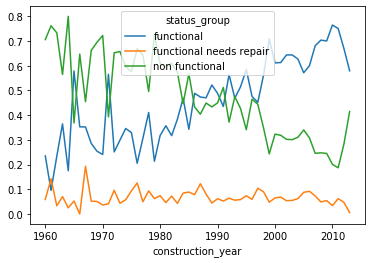

In [13]:
status_by_year[status_by_year.index > 0].plot(kind='line')

### Exploring the categorical variables
Categorical variables provide challenges in building predictive models in sklearn. For example, when we built regression models in R, we simply included categorical variables in our regression formulas and R automatically created dummy (binary indicator) variables. In sklearn, we have to do this work ourself. Similarly, the implementation of random forests in the R randomForest package can handle categorical variables with no preprocessing necessary.
Thankfully, sklearn has a number of tools to help you properly encode such variables for different models and algorithms. We will explore this in more detail in the next notebook when we build models. For now, check out the following two blog posts that address this topic.

* https://pbpython.com/categorical-encoding.html from Practical Business Python
* http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/



Review the EDA reports to look for:

* obvious variables to drop due to things like little to no variance in the variable values.
* variables that might be candidates for lumping due to huge numbers of unique values
* categorical variables that are related to each other - e.g. hierarchical relationships such as `extraction_type`, `extraction_type_group`, `extraction_type_class`

<div class="alert alert-block alert-info">
<b>SIDEBAR:</b> How does one do dplyr type chaining with pandas?
</div>

When exploring categorical data with pandas, sometimes I find myself longing for the R package, dplyr. For example how to do this dplyr type analysis in pandas?

    train %>% 
      group_by(payment) %>% 
      summarize(
        num_installs = n(),
        pct_functional = sum(status_group == 'functional') / num_installs
      ) %>% 
      filter(num_installs > 100) %>%
      arrange(desc(pct_functional))

To get:

    payment  num_installs   pct_functional
    pay annually	3642	0.7523339	
    pay per bucket	8985	0.6777963	
    ...
    
More generally, how to visualize the breakdown of the categorical target variable within levels of some categorical predictor? Is it just a heat map? Or entropy or gini by level in comparison (perhaps weighted by number of observations in the level) to entropy/gini of target?

Down the rabbit hole with the following reddit post. Good stuff found in there and a generally useful discussion. More work going on in adding tidyverse approaches to pandas Python.

* https://www.reddit.com/r/datascience/comments/ltkt9s/r_is_far_superior_to_python_for_data_manipulation/
* https://tomaugspurger.github.io/modern-1-intro
* https://tomaugspurger.github.io/method-chaining - this is really good
* https://stmorse.github.io/journal/tidyverse-style-pandas.html - and so is this
* [R to Python data wrangling snippets](https://gist.github.com/conormm/fd8b1980c28dd21cfaf6975c86c74d07)
* https://www.tidymodels.org/
* https://pyjanitor.readthedocs.io/
* https://towardsdatascience.com/the-unreasonable-effectiveness-of-method-chaining-in-pandas-15c2109e3c69
* https://github.com/machow/siuba

<div class="alert alert-block alert-info">
<b>END OF SIDEBAR</b> Be careful before checking out the reddit discussion above as it can become a time sink (though an interesting and useful one).
</div>

### Geographic categorical variables

There are several categorical variables that are geographic in nature.

* `wpt_name` - waterpoint name (if exists)
* `basin` - Geographic water basin
* `subvillage` - Geographic location
* `region` - Geographic location
* `region_code` - Geographic location (coded)
* `district_code` - Geographic location (coded)
* `lga` - Geographic location
* `ward` - Geographic location

In [25]:
geo_cols = ['wpt_name', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward']

train_df.loc[:, geo_cols].describe()

,region_code,district_code
count,59400.000000,59400.000000
mean,15.297003,5.629747
std,17.587406,9.633649
min,1.000000,0.000000
25%,5.000000,2.000000
50%,12.000000,3.000000
75%,17.000000,5.000000
max,99.000000,80.000000


Let's drop `region_code` and just use `region`. Let's also remove `wpt_name`, `subvillage` and `ward` as too detailed.

In [26]:
cols_to_keep.remove('region_code')
cols_to_keep.remove('wpt_name')
cols_to_keep.remove('subvillage')
cols_to_keep.remove('ward')

In [27]:
train_df = train_df.loc[:, cols_to_keep]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   num_private            59400 non-null  int64  
 8   basin                  59400 non-null  object 
 9   region                 59400 non-null  object 
 10  district_code          59400 non-null  int64  
 11  lga                    59400 non-null  object 
 12  population             59400 non-null  int64  
 13  public_meeting         56066 non-null  object 
 14  scheme_management      55523 non-null  object 
 15  sc

### Hierarchical variables

* `scheme_name`
  `scheme_management`
  
* `extraction_type`
  `extraction_type_group`
  `extraction_type_class`

* `management`
  `management_group`
 
* `payment`
  `payment_type`
 
* `water_quality`
  `quality_group`
 
* `quantity`
  `quantity_group`
 
* `source`
  `source_type`
  `source_class`
 
* `waterpoint_type`
  `waterpoint_type_group`
 
We should explore these more deeply, but for now, let's just include the most aggregate version of each variable.

In [28]:
aggs_to_drop = ['extraction_type', 'extraction_type_group', 'management', 'payment', 'water_quality',
               'quantity', 'source', 'source_type', 'waterpoint_type', 'scheme_name']

cols_to_keep = [c for c in cols_to_keep if c not in aggs_to_drop]
cols_to_keep

train_df = train_df.loc[:, cols_to_keep]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   num_private            59400 non-null  int64  
 8   basin                  59400 non-null  object 
 9   region                 59400 non-null  object 
 10  district_code          59400 non-null  int64  
 11  lga                    59400 non-null  object 
 12  population             59400 non-null  int64  
 13  public_meeting         56066 non-null  object 
 14  scheme_management      55523 non-null  object 
 15  pe

### Missing data
Will just fill missing data in the categorical fields with "missing".

In [29]:
train_df['funder'] = train_df['funder'].fillna("missing")
train_df['installer'] = train_df['installer'].fillna("missing")
train_df['public_meeting'] = train_df['public_meeting'].fillna("missing")
train_df['scheme_management'] = train_df['scheme_management'].fillna("missing")
train_df['permit'] = train_df['permit'].fillna("missing")

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 59400 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              59400 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   num_private            59400 non-null  int64  
 8   basin                  59400 non-null  object 
 9   region                 59400 non-null  object 
 10  district_code          59400 non-null  int64  
 11  lga                    59400 non-null  object 
 12  population             59400 non-null  int64  
 13  public_meeting         59400 non-null  object 
 14  scheme_management      59400 non-null  object 
 15  pe

### More on categorical data

In [30]:
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['funder',
 'installer',
 'basin',
 'region',
 'lga',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type_class',
 'management_group',
 'payment_type',
 'quality_group',
 'quantity_group',
 'source_class',
 'waterpoint_type_group',
 'status_group']

In [21]:
train_df.loc[:, categorical_cols].describe()

,funder,installer,basin,region,district_code,lga,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group
count,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,1898,2146,9,21,20,125,3,13,3,7,5,7,6,5,3,6,3
top,Government Of Tanzania,DWE,Lake Victoria,Iringa,1,Njombe,True,VWC,True,gravity,user-group,never pay,good,enough,groundwater,communal standpipe,functional
freq,9084,17402,10248,5294,12203,2503,51011,36793,38852,26780,52490,25348,50818,33186,45794,34625,32259


What options exist for category lumping in Python? I'm thinking of the forcats package in R. Can we do useful lumping with `funder` and `installer`? These feel like they might have decent predictive value.

The [siuba](https://github.com/machow/siuba) package is a Python port of dplyr. The author implemented forcats as a module in that package and is now moving it to its own package. See https://pypi.org/project/forcats-py/#description. I pip installed siuba to check it out. There's no need for you to do so unless you want to try it out for yourself. I'll be providing the pre-processed dataset based on this data prep notebook.

In [32]:
from siuba.dply.forcats import fct_lump

In [33]:
fct_lump(train_df['funder'], n=10).value_counts()

Other                     34175
Danida                     3114
Government Of Tanzania     9084
Hesawa                     2202
Kkkt                       1287
Rwssp                      1374
Tasaf                       877
Unicef                     1057
World Bank                 1349
World Vision               1246
missing                    3635
dtype: int64

In [34]:
fct_lump(train_df['installer'], n=10).value_counts()

Other         29980
0               777
Commu          1060
DANIDA         1050
DWE           17402
Government     1825
Hesawa          840
KKKT            898
RWE            1206
TCRS            707
missing        3655
dtype: int64

Let's do this for now.

In [35]:
train_df['funder'] = fct_lump(train_df['funder'], n=10)
train_df['installer'] = fct_lump(train_df['installer'], n=10)
train_df['scheme_management'] = fct_lump(train_df['scheme_management'], n=10)

train_df.loc[:, categorical_cols].describe()

,funder,installer,basin,region,lga,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group
count,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,11,11,9,21,125,3,10,3,7,5,7,6,5,3,6,3
top,Other,Other,Lake Victoria,Iringa,Njombe,True,VWC,True,gravity,user-group,never pay,good,enough,groundwater,communal standpipe,functional
freq,34175,29980,10248,5294,2503,51011,36793,38852,26780,52490,25348,50818,33186,45794,34625,32259


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     59400 non-null  int64   
 1   amount_tsh             59400 non-null  float64 
 2   funder                 59400 non-null  category
 3   gps_height             59400 non-null  int64   
 4   installer              59400 non-null  category
 5   longitude              59400 non-null  float64 
 6   latitude               59400 non-null  float64 
 7   num_private            59400 non-null  int64   
 8   basin                  59400 non-null  object  
 9   region                 59400 non-null  object  
 10  district_code          59400 non-null  int64   
 11  lga                    59400 non-null  object  
 12  population             59400 non-null  int64   
 13  public_meeting         59400 non-null  object  
 14  scheme_management      59400 non-null 

## Before moving on to model building

The work we did above is pretty typical data prep work to get ready to build predictive models. However, Jupyter notebooks such as this one, while great for documenting our thinking and exploration, is not that great for automated workflows. So, I'll typically extract the relevant code and create a data prep script that I can rerun as needed to generate preprocessed data files for the next stage in our analysis. See `data_prep.py` for the code I ended up with for this dataset. You'll see that it ends with exporting to both csv and json files since I wanted to experiment with both formats.

In [ ]:
# %load data_prep.py
import pandas as pd
from siuba.dply.forcats import fct_lump


train_x = pd.read_csv("./data/raw/train_x.csv", parse_dates=['date_recorded'])
train_y = pd.read_csv("./data/raw/train_y.csv")
test_x = pd.read_csv("./data/raw/test_x.csv", parse_dates=['date_recorded'])

dict_df = {"train_x": train_x,
           "test_x": test_x}
           
for key in dict_df:

    df = dict_df[key]

    # Initialize list of columns to keep
    cols_to_keep = df.columns.tolist()

    to_drop = ['date_recorded', 'recorded_by']
    cols_to_keep = [c for c in cols_to_keep if c not in to_drop]

    # Geo cols to remove
    cols_to_keep.remove('region_code')
    cols_to_keep.remove('district_code')
    cols_to_keep.remove('wpt_name')
    cols_to_keep.remove('subvillage')
    cols_to_keep.remove('ward')

    # Aggregated cols to remove
    aggs_to_drop = ['extraction_type', 'extraction_type_group', 'management', 'payment', 'water_quality',
                   'quantity', 'source', 'source_type', 'waterpoint_type', 'scheme_name']

    cols_to_keep = [c for c in cols_to_keep if c not in aggs_to_drop]

    df = df.loc[:, cols_to_keep]


    # Change booleans to strings
    df["permit"] = df["permit"].astype("string")
    df["public_meeting"] = df["public_meeting"].astype("string")

    # Missing data - code as "missing" for categorical data
    df['funder'] = df['funder'].fillna("missing")
    df['installer'] = df['installer'].fillna("missing")
    df['public_meeting'] = df['public_meeting'].fillna("missing")
    df['scheme_management'] = df['scheme_management'].fillna("missing")
    df['permit'] = df['permit'].fillna("missing")


    # Factor level lumping

    df['funder'] = fct_lump(df['funder'], n=10)
    df['installer'] = fct_lump(df['installer'], n=10)
    df['scheme_management'] = fct_lump(df['scheme_management'], n=10)
    
    df.to_json(f"data/{key}.json", orient='records')
    df.to_csv(f"data/{key}.csv", index=False)


## Further exploration
In the process of putting this notebook together, I ran across numerous interesting and relevant Python packages. I'll mention two of them and you can explore them if you are interested.


### HoloViews

This is another data visualization package. It has a different philosophy than packages like matplotlib and Seaborn (at least that's what they say):

> HoloViews helps you understand your data better, by letting you work seamlessly with both the data and its graphical representation.

* https://holoviews.org/index.html
* https://holoviews.org/getting_started/Introduction.html

### Pyvtreat

In the pcda class, one of the textbooks we use is *Practical Data Science with R* by Mount and Zumel. They created an R package called vtreat for preparing data for predictive modeling. Now it appears they've ported to Python.

* https://github.com/WinVector/pyvtreat